In [1]:
from torchvision import datasets, transforms
import torch
from tqdm import tqdm

In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
tc = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()              
    ])

In [15]:
images=[]

In [16]:
data_dir = '/kaggle/input/raw-images/raw-images/train/dresses'
n=len(os.listdir(data_dir))

for i in range(n):
    img = Image.open(f'{data_dir}/dresses-image{i}.jpg')
    img=tc(img)
    images.append(img)

In [17]:
len(images)

4161

In [18]:
images=torch.stack(images)

In [35]:
dloader = torch.utils.data.DataLoader(images, batch_size=10, shuffle=False)

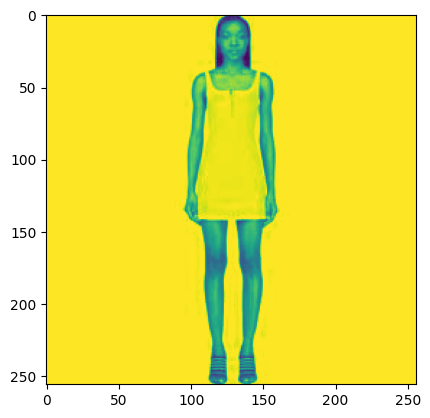

In [38]:
plt.imshow(images[3][0])

torch.Size([256, 256, 3])
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


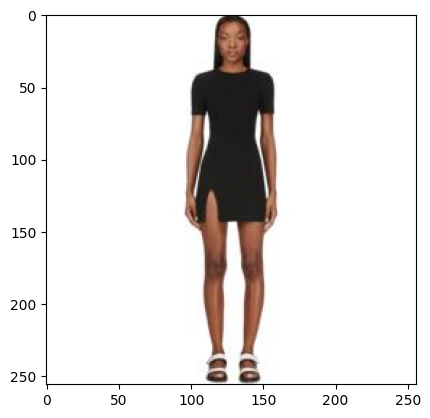

In [40]:
i=0
for img in dloader:
      print(np.transpose(img[0], (1,2,0)).shape)
      print(img[i])
      plt.imshow((img[i].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
      plt.show()
      i = i + 1
      break

In [41]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 118MB/s] 


In [42]:
layer = model._modules.get('avgpool')

In [43]:
def copy_embeddings(m, i, o):
    """Copy embeddings from the penultimate layer.
    """
    o = o[:, :, 0, 0].cpu().detach().numpy().tolist()
    outputs.append(o)

In [44]:
outputs = []
# attach hook to the penulimate layer
hook_handle = layer.register_forward_hook(copy_embeddings)

In [45]:
# model.to('cuda')
model.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [47]:
for X in tqdm(dloader, desc="Processing dataset", unit="batch"):
    X = X
    _ = model(X)
print(len(outputs)) #returns 92

Processing dataset:   2%|▏         | 10/417 [00:08<05:54,  1.15batch/s]


KeyboardInterrupt: 

In [163]:
hook_handle.remove()

In [164]:
# flatten list of embeddings to remove batches
list_embeddings = [item for sublist in outputs for item in sublist]

print(len(list_embeddings)) # returns 918
print(np.array(list_embeddings).shape) #returns (512,)

18244
(18244, 1024)


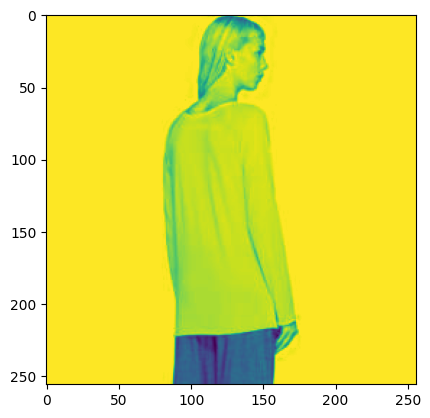

In [241]:
plt.imshow(image_datasets[867+3000+1239+2136+1039+682+639+256+4047+4339][0][0])

In [242]:
subset=torch.Tensor(list_embeddings[867+3000+1239+2136+1039+682+639+256+4047:867+3000+1239+2136+1039+682+639+256+4047+4339])

In [243]:
torch.save(subset,'/kaggle/working/tops.t7')

In [255]:
data=torch.load('/kaggle/working/tops.t7')
len(data)

4339

In [256]:
!zip -r val-emb.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/shirts.t7 (deflated 10%)
  adding: kaggle/working/jeans.t7 (deflated 11%)
  adding: kaggle/working/suits and blazers.t7 (deflated 11%)
  adding: kaggle/working/pants.t7 (deflated 11%)
  adding: kaggle/working/dresses.t7 (deflated 11%)
  adding: kaggle/working/skirts.t7 (deflated 11%)
  adding: kaggle/working/shorts.t7 (deflated 11%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/jackets and coats.t7 (deflated 10%)
  adding: kaggle/working/sweaters.t7 (deflated 10%)
  adding: kaggle/working/tops.t7 (deflated 11%)


In [149]:
from IPython.display import FileLink

In [257]:
FileLink(r'val-emb.zip')

/kaggle/working/val-emb.zip